# TP1 Apprentissage Automatique 2

## Régression linéaire

### réalisé par : MULAPI TITA Ketsia

______________________________________

#### Quid ? 

Le but de ce TP est d’implémenter et de tester une méthode de régression linéaire sur des problèmes réels. 
Pour cela, nous utiliserons les librairies python suivantes :

1) Scikit-learn 
2) Numpy 2 et, 
3) Matplotlib.pyplot

Ainsi que tout autre librairie que nous jugerons utiles.

In [34]:
from sklearn.datasets import load_boston
from numpy.linalg import inv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.close("all")

## Partie 1 : Description des données

Nous allons travailler sur deux jeux de données :

◦ Boston Housing

◦ Diabetes

tous deux disponibles directement dans la librairie Scikit-learn, sous sklearn.datasets. 
Pour chaque exercice de ce TP, il nous est demandé de tester ces deux jeux de données.

In [2]:
from sklearn import datasets as datas

In [3]:
def lever_une_exception(dataset):
    '''
    Cette fonction : permet des lever des exceptions selon que 
    l'on ne manipule pas les bons datasets.
    '''
    raise Exception("le dataset "+dataset+" n\'existe pas")

In [4]:
def get_Data(dataset):
    '''
    Cette fonction : renvoie les données X, y selon que l'on souhaite 
    avoir un dataset <Housing Boston> ou, <diabetes>, 
    dans le cas contraire il ne retourne rien (une erreur).
    - dataset : le dataset qu'on veut (boston, diabetes)
    - Valeur de retour : (X, y)
    - X : Caractéristiques (variables ou dimensions)
    - y : Réponses associées
    '''
    if dataset=='boston' :
        return datas.load_boston(return_X_y=True)
    elif dataset=='diabetes':
        return datas.load_diabetes(return_X_y=True)
    return lever_une_exception(dataset)

Dans un script python, chargez les deux jeux de données. Si vous ne savez pas comment faire,
vous pouvez vous référer à la documentation de Scikit-learn 4

In [5]:
# récupération des données, b pour boston et d pour diabetes
Xb, yb = get_Data('boston')
Xd, yd = get_Data('diabetes')

In [6]:
# Et si on récupère autre chose ? :
Xo, yo = get_Data('other')

Exception: le dataset other n'existe pas

Analysez le contenu des deux jeux que vous avez chargez et donnez une description des données et de la problématique sous-jacente

In [11]:
import pandas as pd

In [12]:
def get_description(X, y, dataset):
    '''
    Cette focntion : renvoie la dimension d'un jeu en X et en y,
    ainsi qu'une description statistiques et, les différentes corrélation entre les X
    '''
    if dataset=='load_boston' :
        labels = datas.load_boston()
    elif dataset=='load_diabetes' :
        labels = datas.load_diabetes()
    else :
        lever_une_exception(dataset)
    labels = labels.feature_names
    df_x = pd.DataFrame(X, columns=labels)
    df_y = pd.DataFrame(y)
    return df_x.shape, df_x.describe(), df_x.corr(), df_y.shape, df_y.describe()
    

- Analyse Boston

In [13]:
dim_xB, desc_xB, xB_corr, dim_yB, desc_yB = get_description(Xb, yb, 'load_boston')

In [14]:
# dimensions de X
dim_xB

(506, 13)

In [15]:
# description statistique de X
desc_xB

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [16]:
# dimensions de y
dim_yB

(506, 1)

In [17]:
# description statistique de y
desc_yB

,0
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [18]:
# les corrélations
xB_corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


#### Constat :

Pour le dataset Boston on peut voir que nous disposons de 506 observations (exemples ou occurences) aussi bien pour nos caractéristiques (X), que pour notre vairable cible (y).

Par ailleur, on compte 13 dimensions (variables) pour nos X et une seule pour y, ce qui implique que notre prediction sera univariée.

Statistiquement parlant, on peut observer que l'échelle des variables diffèrent d'une variable à une autre, par exemple, alors que la variabe CRIM a une valeur moyenne de (3.6), la variable TAX (Taux d'imposition foncière sur la valeur totale par tranche de 10 000 $) quant à elle a une valeur moyenne de (408.2) soit, 100 fois plus que CRIM (taux de criminalité par habitant par ville). Mais jusque là, sans avoir lu la littérature, nous ne pouvons pas savoir si on doit s'intérresser à l'échelle d'une variable en particulier, selon que celle-ci sera la plus influente lors de la prédiction, ici on s'intérresse à la Valeur médiane des maisons occupées par leur propriétaire en milliers de dollars, ce qui signifie que la médianne est un mesure important dans ce contexte.

Enfin, l'une des difficultés que l'on pourrait rencontrer c'est de travailler avec des variables très correlées, ici par exemple on voit que (TAX, INDUS) : 0.72 et, (TAX, NOX) : 0.66, sont les plus correlés, on pourrait s'intérresser à les supprimer afin de réduire le bruit mais seulement, ce n'est certainement pas l'objetcif de ce TP.

    - NOX : Concentration d'oxydes nitriques NOX (parties par 10 millions)
    - INDUS : Proportion INDUS d'acres commerciales non commerciales par ville

- Analyse Diabetes

In [19]:
dim_xD, desc_xD, xY_corr, dim_yD, desc_yD = get_description(Xd, yd, 'load_diabetes')

In [20]:
# dimensions de X
dim_xD

(442, 10)

In [21]:
# description statistique de X
desc_xD

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [22]:
# dimension y
dim_yD

(442, 1)

In [23]:
# description statistique de y
desc_yD

,0
count,442.000000
mean,152.133484
std,77.093005
min,25.000000
25%,87.000000
50%,140.500000
75%,211.500000
max,346.000000


In [24]:
# les corrélations
xY_corr

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000


#### Constat :

Pour le dataset Diabetes on peut voir que nous disposons de 402 observations (exemples ou occurences) aussi bien pour nos caractéristiques (X), que pour notre vairable cible (y).

Par ailleur, on compte 10 dimensions (variables) pour nos X et une seule pour y, ce qui implique que notre prediction sera univariée.

Statistiquement parlant, on peut observer que l'échelle des variables diffèrent pas autant que dans le dataset précédent et, puisque jusque là, sans avoir lu la littérature, nous ne pouvons pas savoir si on doit s'intérresser à l'échelle du'ne variable en particulier, selon que celle-ci soit la plus influente en terme de prédiction, ici nous prédision (la réponse d'intérêt) une mesure quantitative de la progression de la maladie un an après le départ.

Enfin, l'une des difficultés que l'on pourrait rencontrer c'est de travailler avec des variables très correlées, ici par exemple on voit que (s4, s2) et, (s5, s4) sont les plus correlés mais ne sont pas aussi correlé que dans le dataset précédent, les supprimer afin de réduire le bruit n'est vraiement pas nécessaire, mais toutes fois ici, ce n'est certainement pas l'objetcif de ce TP. 

    - s2 : ldl (low-density lipoproteins), lipoprotéines de basse densité
    - s4 : tch (total cholesterol), cholestérol total / HDL
    - s5 : ltg (log of serum triglycerides level), éventuellement logarithme du taux de triglycérides sériques

Visualisez l’ensemble des données en fonction de chaque variable explicative et de la réponse, où chaque sous-figure est la représentation des données
en fonction d’une des variables explicatives en abscisse, et de la réponse en ordonnée.

In [35]:
def get_fig(X,y):    
    '''
    Cette fonction affiche la figure demandé,
    il s'agit des nuages de points entre les valeurs de chaque vairables et,
    la réponse
    '''
    fig = plt.figure()
    fig.set_size_inches((15,15))
    f, ax = plt.subplots(4,4)
    k = X.shape[1]
    n = k
    for i in range(4):
        if(i==3):
            break
        for j in range(4):
            ax[i][j].scatter(X[:,n-k],y)
            k = k-1
    ax[3][0].scatter(X[:,12],y)
    plt.show()

<Figure size 1080x1080 with 0 Axes>

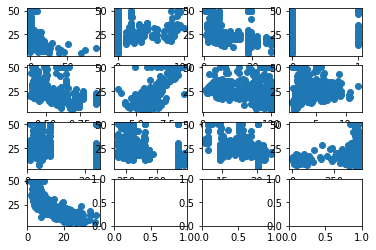

In [36]:
get_fig(Xb,yb)

## Partie 2 : Régression des moindres carrés ordinaires

Nous créons la matrice d’apprentissage X telle que nous l’avons vu en cours, en ajoutant une colonne de 1 aux exemples. Cette matrice est appelé ”matrice augmentée” par la suite.

In [37]:
# dans notre cs, Xb et Xd qui représentent
# la matrice X pour boston et, la matrice X pour le diabète, respectivement
Xb, Xd

(array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0

In [38]:
def get_matAugmented(X):
    '''
    A l'image de notre cours de HPC (High Performance Computing),
    nous adoptons pour une façon optimale de faire élargir notre matrice X,
    Cette focntion renvoie : la matrice X augmentée,
    c'est à dire avec une colonne supplémentaire, représentant ici le biais.
    le biais = 1
    '''
    idim,jdim = X.shape
    Xplus = np.ones((idim,jdim + 1))
    Xplus[:,0:jdim] = X[:,:]
    return Xplus

In [39]:
pd.DataFrame(get_matAugmented(Xb))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,1.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,1.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,1.0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,1.0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,1.0
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,1.0
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,1.0
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,1.0


In [40]:
# respectivement Xb et Xd augmentées
Xb_plus = get_matAugmented(Xb)
Xd_plus = get_matAugmented(Xd)


Nous éstimons à présent les paramètres des moindres carrés sur les données. Stockez ces paramètres dans
un vecteur w et un biais b

In [41]:
def get_estimateParams(X_plus,y):
    '''
    Cette focntion : retourne les paramètres estimés, 
    dans l'ordre suivant W, biais
    - X_plus ::: C'est la matrice augmentée, qui contient le biais
    - alpha ::: np.inv(X.T @ X) @(X.T@y)
    - nos paramètres W selon chaque features ::: alpha[:-1]
    - le biais ::: alpha[-1]
    remarque ::: on comprend est un vecteur de apramètres et,
    que selon la matrice augmentée construite, le dernier paramètre est le biais
    NB : Cette partie est inspirée d'un code présent sur internet.
    '''
    return (inv(X_plus.T @ X_plus) @(X_plus.T@y))[:-1], (inv(X_plus.T @ X_plus) @(X_plus.T@y))[-1]

In [42]:
# W et B, respectivement, les apramètres du modèles (des features en particulier) et,  
# du biais, pour boston et diabètes
Wb, Bb = get_estimateParams(Xb_plus,yb)
Wd, Bd = get_estimateParams(Xd_plus,yd)

In [43]:
print("***Pour boston*** \n")
print("le biais : ",Bb)
print("\nles paramètres du modèles (des features) : \n",Wb)
print("\n ***Pour diabetes*** \n")
print("le biais : \n",Bd)
print("\nles paramètres du modèles (des features) : \n",Wd)

***Pour boston*** 

le biais :  36.45948838506774

les paramètres du modèles (des features) : 
 [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]

 ***Pour diabetes*** 

le biais : 
 152.13348416289648

les paramètres du modèles (des features) : 
 [ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]


Constat :

Le biais du dataset Boston est plus fiable que celui des données du diabète.

retenons juste que, le biais nous permet d'ajuster notre droite de regression.

On affiche le nuage de points (scatterplot) des valeurs réponses prédites et réelles, nous devons donc prédire des réponses avant d'effectuer cette comparaison.

In [44]:
def predict(X, W, B):
    '''
    Cette focntion ::: prédit des valeurs, pour des X inconnu au moment de l'apprentissage
    X ::: X_test
    W ::: Les paramètres
    B ::: Biais
    retour ::: Cette focntion renvoie donc y_pred = X@W + B
    '''
    return X@W + B

In [45]:
# y_pred pour Boston et Diabete, respetivement
yB_pred = predict(Xb, Wb, Bb)
yD_pred = predict(Xd, Wd, Bd)

In [46]:
def afficher_ScatterPlot(y,y_pred,dataset):
    '''
    Cette focntion : permet d'afficher le rapport en nuage de points
    entre la réalité (y réels) et, la prédiciton (y prédits)
    dataset ::: le nom du jeux affiché
    '''
    fig, ax = plt.subplots()
    ax.scatter(y, y_pred, color='black')
    ax.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
    ax.set_xlabel('Réalité')
    ax.set_ylabel('Prediction')
    ax.set_title(""+dataset)
    plt.show()

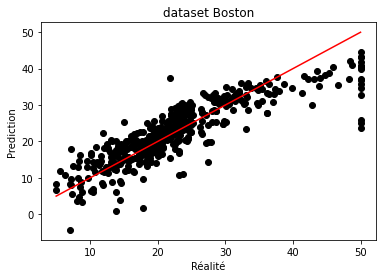

In [47]:
afficher_ScatterPlot(yb,yB_pred,'dataset Boston')

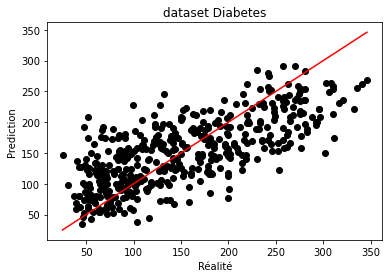

In [48]:
afficher_ScatterPlot(yd,yD_pred,'dataset Diabetes')

### Constat :

Nous osons donc dire que, nos modèles n'ont pas sur appris et, qu'ils ont plus au moins bien appris (boston en particulier qui a mieux appris) car la droite de regression passe plus au moins entre le centre de ces données, autrement, le fait qu'on approche une correlation presque parfaite, prouve que nous approchons de la réalité (dans les 2 cas).

Maintenant que nous avons pu calculer et faire une évaluation "qualitative" de nos résultats au travers de ces représentations graphique, nous alons à présent calculez et affichez l’erreur quadratique moyenne ainsi que le coefficient de corrélation entre les valeurs prédites et réelles, dans le but de faire une évaluation "quantitative" au regard des valeurs quantitative que nous obtiendrons.

Ces évaluations quantitatives, nous le faisons à l'aide de 2 outils d'évaluation de la qualité de nos données. nous observerons aussi dans la suite, graphiquement le sens ou l'orientation que prennent ces 2 mesures. 

In [49]:
def MSE(y, y_pred):
    '''
    Cette focntion de cout : renvoie l'erreur quadrtique moyenne,
    On dit que les équations normales reposent sur la méthode des moindres carrées, 
    et que c’est plus rapide que le Gradient Descent (que nous utiliserons dans la regresison logistique).
    elle se base sur la norme euclidienne, afin de mesurer les erreurs entre 𝒇(𝒙) et (𝒚).
    Cela signifie que chaque prédiction est accompagnée d'une erreur, 
    mais ici on s'intérresse à la moyenne de toutes les prédictions

    '''
    return 1/len(y_pred)*np.sum((y - y_pred)**2)

In [50]:
def r(y, y_pred):
    '''
    Cette fonction de cout : renvoie le coefficient "r" de corrélation,
    qui va mesure le lien ou, la relation qui existe entre les prédictions et,
    la réalités. On sera donc content si notre r sapproche de 1.
    '''
    return (1/len(y_pred)*sum((y - np.mean(y))* (y_pred - np.mean(y_pred))))/(y_pred.std()*y.std())

In [51]:
# pour Boston
mse_b = MSE(yb, yB_pred)
r_b = r(yb, yB_pred)

In [52]:
mse_b

21.894831181729206

In [53]:
r_b

0.8606059865637755

In [54]:
# pour Diabetes
mse_d = MSE(yd, yD_pred)
r_d = r(yd, yD_pred)

In [55]:
mse_d

2859.6903987680657

In [56]:
r_d

0.7195480702588907

#### constat :

Comme vu plus haut (analytiquement), le modèle prédictif Boston semble mieux approcher la rélité que, le modèle prédicitf Diabètes ainsi, nous sommes sans ignorer maintenant que, le mse dépent fortement de l'échelle des données de départ, cela explique aussi que pour comparer les 2 modèles, l'idéal serait d'observer le coefficient de correlation, qui fait une évaluation sur la base d'une même échelle : [-1,1]. 
Et donc, c'est au regard de cette mesure que nos pouvons dire que le coeff (r) boston étant supérieur à celui du diabètes, car se rapprochant de plus en plus de 1, prédit (décide) mieux.

## Partie 3 : Régression Ridge

Dans cette partie, nous allons tester et comparer plusieurs modèles entre eux. Pour cela, il faut séparer les données en deux sous-ensembles : 

un pour l’apprentissage et l’autre pour le test des modèles, à l'aide de la fonction train_test_split de Scikit-learn. On utilisera alors un tier des données pour le test et le reste pour l’apprentissage.

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
Xd_train, Xd_test, yd_train, yd_test = train_test_split(Xd, yd, test_size=0.3, random_state=42)
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size=0.3, random_state=42)

Créez une fonction permettant de calculer la solution d’un problème de régression ridge en
fonction de X, y et λ

In [59]:
def reg_ridge(X,y,lambda_):
    '''
    Cette fonction : résout les problèmes n < d+1 et, quand X.T@X n'est pas inversible
    elle retourne alors une valeur alpha tel que définit en cours (page 32), qui dépend d'un hyperparamètre lambda,
    lambda_ ::: est un hyper paramètre de régularisation et,
    S ::: est une matrice diagonale
    lambda_ * S : est une matrice diagonale de lambda qu'on ajoute à X.T@X
    '''
    d = X.shape[1]
    S = np.diag(np.ones(d))
    S[d-1,d-1] = 0
    return np.dot(inv(np.dot(X.T, X) + lambda_*S), np.dot(X.T,y))

Pour un ensemble de valeurs possibles de λ, calculons la solution du problème et calculez l’erreur quadratique et le coefficient de corrélation sur l’ensemble d’apprentissage et de test. 

On pourra utilise les valeurs lambda = numpy.logspace(-4,2,20)

In [60]:
# ce vecteur d'hyper paramètre lambda est un vecteur de valeur logarithmique (base 10)
# il contient 20 élements, pris entre -4 et 2
# on obtient alors, un ensemble de puissnace de 10 allant de 10⁽-4⁾ à 10⁽2⁾
lambda_vec = np.logspace(-4,2,20)
lambda_vec

array([1.00000000e-04, 2.06913808e-04, 4.28133240e-04, 8.85866790e-04,
       1.83298071e-03, 3.79269019e-03, 7.84759970e-03, 1.62377674e-02,
       3.35981829e-02, 6.95192796e-02, 1.43844989e-01, 2.97635144e-01,
       6.15848211e-01, 1.27427499e+00, 2.63665090e+00, 5.45559478e+00,
       1.12883789e+01, 2.33572147e+01, 4.83293024e+01, 1.00000000e+02])

In [61]:
def get_reg_ridge_pred(mse, lambda_vec, X_train, y_train, X_test, y_test):
    '''
    Cette focntion prédits à l'aide d'une regression ridge
    '''
    m = np.copy(mse)
    for i,lambda_ in enumerate(lambda_vec):
        y_pred = X_test@reg_ridge(X_train,y_train, lambda_)
        m[i] = np.linalg.norm(y_test-y_pred)
    return m, y_pred

In [62]:
mse_init = np.zeros(len(lambda_vec))

In [63]:
# Boston

mseB_ridge, y_pred_B = get_reg_ridge_pred(mse_init, lambda_vec, Xb_train, yb_train, Xb_test, yb_test)

In [64]:
# Diabetes

mseD_ridge, y_pred_D = get_reg_ridge_pred(mse_init, lambda_vec, Xd_train, yd_train, Xd_test, yd_test)

Affichez sur une figure l’erreur en test et en apprentissage en fonction de λ. Dans la mesure du
possible, on choisira deux échelles différentes pour les deux erreurs

In [65]:
def get_figError(lambda_vec, mse):
    '''
    Cette fonction affiche la courbe d'erreur d'apprentissage et de test pour l'erreur de mse
    '''
    fig, ax = plt.subplots()
    ax.semilogx(lambda_vec,mse, color='red')
    ax.set_xlabel('Lambda')
    ax.set_ylabel('Erreur')
    plt.show()

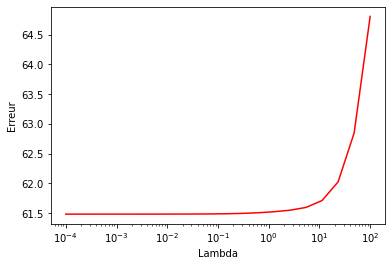

In [66]:
get_figError(lambda_vec, mseB_ridge)

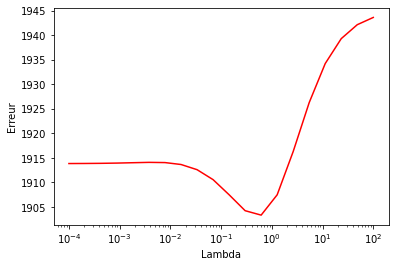

In [67]:
get_figError(lambda_vec, mseD_ridge)

## Partie 4 : Normalisation

Il est souvent important lorsque l’on fait de la régression (et pas que) de normaliser les données pour
faciliter l’apprentissage ou améliorer la qualité du modèle. Cela consiste souvent à uniformiser les
valeurs prises par chaque variable explicative, par exemple pour faire en sorte que leurs moyennes
soient 0 (on centre la variable) et leurs écarts-type soit 1 (on réduit la variable). Nous allons voir dans
cet exercice quelques effets de ce type de pré-traitements.

In [68]:
def normaliser(X):
    '''
    Cette méthode centre les données, c'ets à dire qu'elle les retire la moyenne
    '''
    return X - np.mean(X, axis=0)

A) Séparez les données en deux sous-ensembles apprentissage/test : 

On se base sur les mêmes données séparé en test_train_split afin de faire une bonne comparaison.

B) Centrez les données d’apprentissage et leurs réponses, en retranchant aux valeurs la moyenne
de l’échantillon

In [69]:
# Boston

Xb_train_c = normaliser(Xb_train)
yb_train_c = normaliser(yb_train)

In [70]:
# Diabetes

Xd_train_c = normaliser(Xd_train)
yd_train_c = normaliser(yd_train)

Calculez le modèle de regression ridge sur les données centrées

In [71]:
# Boston

mseB_ridge_c = get_reg_ridge_pred(mse_init, lambda_vec, Xb_train_c, yb_train_c, Xb_test, yb_test)

In [72]:
# Diabetes

mseD_ridge_c = get_reg_ridge_pred(mse_init, lambda_vec, Xd_train_c, yd_train_c, Xd_test, yd_test)

### Affichez les valeurs

◦ du biais du modèle appris sur les données non-centrées (exercice précédent)


In [73]:
# respectivement Xb et Xd augmentées
Xb_plus_2 = get_matAugmented(Xb_train)
Xd_plus_2 = get_matAugmented(Xd_train)
# W et B, respectivement, les apramètres du modèles (des features en particulier) et,  
# du biais, pour boston et diabètes
Wb_2, Bb_2 = get_estimateParams(Xb_plus_2,yb_train)
Wd_2, Bd_2 = get_estimateParams(Xd_plus_2,yd_train)

In [74]:
# Boston
print("Biais Boston : ", Bb_2)
# Diabet
print("Biais Diabète : ", Bd_2)

Biais Boston :  31.63108403566912
Biais Diabète :  151.00818273080338


◦ de la moyenne des réponses de l’ensemble d’apprentissage


In [75]:
# Boston
print("moyenne des y_train Boston : ", np.mean(yb_train))
# Diabet
print("moyenne des y_train Diabète : ", np.mean(yd_train))

moyenne des y_train Boston :  23.01581920903955
moyenne des y_train Diabète :  153.90291262135923


◦ du biais du modèle appris sur les données centrées mais avec une réponse non-centrée


In [76]:
# respectivement Xb et Xd augmentées
Xb_plus_2_c = get_matAugmented(Xb_train_c)
Xd_plus_2_c = get_matAugmented(Xd_train_c)
# W et B, respectivement, les apramètres du modèles (des features en particulier) et,  
# du biais, pour boston et diabètes
Wb_2_c, Bb_2_Xc = get_estimateParams(Xb_plus_2_c,yb_train)
Wd_2_c, Bd_2_Xc = get_estimateParams(Xd_plus_2_c,yd_train)

◦ du biais du modèle appris sur les données centrées avec une réponse centrée

In [77]:
# Boston
print("Biais Boston : ", Bb_2_Xc)
# Diabet
print("Biais Diabète : ", Bd_2_Xc)

Biais Boston :  23.01581920903956
Biais Diabète :  153.90291262135923


. Comparez maintenant les performances obtenus avec les deux modèles (sur les données centrées et non-centrées). Attention les données de test doivent être centrées avec la moyenne de
l’ensemble d’apprentissage (car nous ne sommes pas sensé connaitre celle de l’ensemble de
test).

. Que constatez-vous ?

In [78]:
# Boston

Xb_test_c = Xb_test-np.mean(Xb_train, axis=0)
yb_test_c = yb_test-np.mean(yb_train, axis=0)

mseB_ridge_c, y_pred_b_c  = get_reg_ridge_pred(mse_init, lambda_vec, Xb_train_c, yb_train_c, Xb_test_c, yb_test_c)

In [79]:
# Diabetes

Xd_test_c = Xd_test-np.mean(Xd_train, axis=0)
yd_test_c = yd_test-np.mean(yd_train, axis=0)

mseD_ridge_c, y_pred_b_c = get_reg_ridge_pred(mse_init, lambda_vec, Xd_train_c, yd_train_c,  Xd_test_c, yd_test_c)

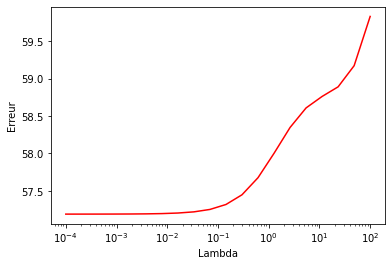

In [80]:
get_figError(lambda_vec, mseB_ridge_c)

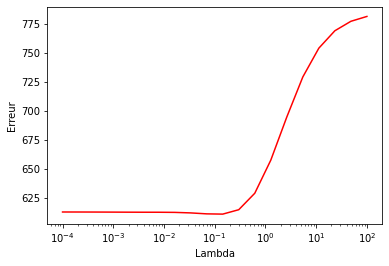

In [81]:
get_figError(lambda_vec, mseD_ridge_c)

Le cosntat est que les données centrées sont beaucoup plus lisses.

. Refaites cette comparaison avec des données centrées et réduites

In [82]:
def standardiser(X):
    '''
    Cette méthode centre et réduit les données, 
    c'ets à dire qu'elle les retire la moyenne et les divise par m'écart type
    '''
    return (X - np.mean(X, axis=0))/np.std(X, axis=0)

A) Séparez les données en deux sous-ensembles apprentissage/test : 

On se base sur les mêmes données séparé en test_train_split afin de faire une bonne comparaison.

B) Centrez les données d’apprentissage et leurs réponses, en retranchant aux valeurs la moyenne
de l’échantillon

In [93]:
# Boston

Xb_train_cr = standardiser(Xb_train)
yb_train_cr = standardiser(yb_train)

In [94]:
# Diabetes

Xd_train_cr = standardiser(Xd_train)
yd_train_cr = standardiser(yd_train)

Calculez le modèle de regression ridge sur les données centrées

In [95]:
# Boston

mseB_ridge_cr = get_reg_ridge_pred(mse_init, lambda_vec, Xb_train_cr, yb_train_cr, Xb_test, yb_test)

In [96]:
# Diabetes

mseD_ridge_cr = get_reg_ridge_pred(mse_init, lambda_vec, Xd_train_cr, yd_train_cr, Xd_test, yd_test)

### Affichez les valeurs

◦ du biais du modèle appris sur les données centrées mais avec une réponse non-centrée


In [97]:
# respectivement Xb et Xd augmentées
Xb_plus_2_cr = get_matAugmented(Xb_train_cr)
Xd_plus_2_cr = get_matAugmented(Xd_train_cr)
# W et B, respectivement, les apramètres du modèles (des features en particulier) et,  
# du biais, pour boston et diabètes
Wb_2_cr, Bb_2_Xcr = get_estimateParams(Xb_plus_2_cr,yb_train)
Wd_2_cr, Bd_2_Xcr = get_estimateParams(Xd_plus_2_cr,yd_train)

◦ du biais du modèle appris sur les données centrées avec une réponse centrée

In [98]:
# Boston
print("Biais Boston : ", Bb_2_Xcr)
# Diabet
print("Biais Diabète : ", Bd_2_Xcr)

Biais Boston :  23.01581920903956
Biais Diabète :  153.90291262135923


. Comparez maintenant les performances obtenus avec les deux modèles (sur les données centrées et non-centrées). Attention les données de test doivent être centrées avec la moyenne de
l’ensemble d’apprentissage (car nous ne sommes pas sensé connaitre celle de l’ensemble de
test).

. Que constatez-vous ?

In [99]:
# Boston

Xb_test_cr = Xb_test-np.mean(Xb_train, axis=0)
yb_test_cr = yb_test-np.mean(yb_train, axis=0)

mseB_ridge_cr, y_pred_b_cr  = get_reg_ridge_pred(mse_init, lambda_vec, Xb_train_cr, yb_train_cr, Xb_test_cr, yb_test_cr)

In [100]:
# Diabetes

Xd_test_cr = Xd_test-np.mean(Xd_train, axis=0)
yd_test_cr = yd_test-np.mean(yd_train, axis=0)

mseD_ridge_cr, y_pred_b_cr = get_reg_ridge_pred(mse_init, lambda_vec, Xd_train_cr, yd_train_cr,  Xd_test_cr, yd_test_cr)

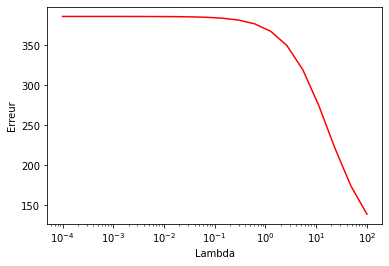

In [101]:
get_figError(lambda_vec, mseB_ridge_cr)

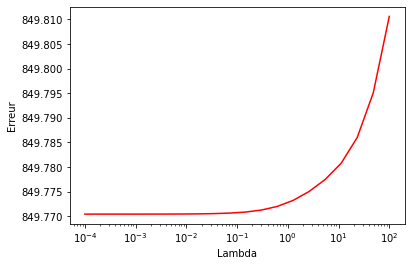

In [102]:
get_figError(lambda_vec, mseD_ridge_cr)

Les données centrées et réduites sont non seulement lissées, masi ont aussi modié l'échelle de nos données.